<a href="https://colab.research.google.com/github/guimazzolino/MVPII/blob/main/MVP2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte B - Guilherme Mazzolino


Para esta segunda parte do trabalho, importei, também do site [kaggle](https://www.kaggle.com/datasets/karmukilan/foodclassification), um dataset com 20 classes distintas de comidas. O principal objetivo desta última parte do projeto consiste em criar um modelo de visão computacional que seja capaz de classificar uma imagem entre essas 20 categorias. No entanto, escolhi apenas 4 classes para seguir no meu trabalho de classificação: burguer, chai, chapati e pizza.

### Importação das Bibliotecas

In [ ]:
# Neste primeiro momento, será necessário a instalação de algumas bibliotecas:
!pip install tensorflow
!pip install keras
!pip install pandas
!pip install scikit-learn
!pip install gdown
!pip install googledrivedownloader

In [39]:
# Importação de todas as bibliotecas que serão utilizadas:

import os
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn.metrics as skm
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from IPython.display import Image, display
from datetime import datetime
from sklearn.metrics import confusion_matrix, classification_report
import itertools
import matplotlib.pyplot as plt
import gdown
import zipfile
from google_drive_downloader import GoogleDriveDownloader as gdd
from google.colab import drive
import gdown
from zipfile import ZipFile


# Como as imagens que utilizarei como dataset estão no Google Drive, torna-se necessário:
# 1) Ler o caminho das pastas e baixa-las e, posteriormente, extrair as pastas de treino, validacao e teste do arquivo.zip

file_id = "1M3KITClcArds849DIWk6bs_f7P9oQlMH"

folder_path = f"https://drive.google.com/uc?id={file_id}"
output = "dataset.zip"
gdown.download(folder_path, output)

with ZipFile('dataset.zip', 'r') as zip_object:
  zip_object.extractall()


Downloading...
From: https://drive.google.com/uc?id=1M3KITClcArds849DIWk6bs_f7P9oQlMH
To: /content/dataset.zip
100%|██████████| 416M/416M [00:04<00:00, 89.9MB/s]


### Acesso e Tratamento dos Dados

In [40]:
# Primeiro, farei a definação dos caminhos para os dados de treinamento e teste:
train_dir = 'dataset/train'
val_dir = 'dataset/validation'
test_dir = 'dataset/test'

# Agora, torna-se necessário a definação do tamanho do batch e as dimensões das imagens:

batch_size = 32
img_height = 224
img_width = 224
num_classes = 4

In [50]:
# Preparação dos Dados:

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

# Criação dos data generators:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size,
                                                    class_mode='categorical') #training set

val_generator = test_datagen.flow_from_directory(val_dir,
                                                target_size=(img_height, img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                target_size=(img_height, img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical')

Found 1044 images belonging to 4 classes.
Found 120 images belonging to 4 classes.
Found 200 images belonging to 4 classes.


### Configuração de um modelo de deep learning

In [51]:
# Definição da Arquitetura do Modelo de deep learning usando uma rede neural convolucional (CNN) simples com a biblioteca Keras:

model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height,img_width,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

### Treinamento do Modelo

In [ ]:
# Este bloco é destinado para renomear o nome de cada uma das imagens:
# Para o diretório Test:
def rename_files_in_subdirectories(parent_dir):
    for subdir in os.listdir(parent_dir):
        subdir_path = os.path.join(parent_dir, subdir)
        if os.path.isdir(subdir_path):
            for idx, file in enumerate(os.listdir(subdir_path), start=1):
                if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.JPG') or file.endswith('.png'):
                    new_filename = f"{subdir}_{str(idx).zfill(2)}.jpg"
                    old_filepath = os.path.join(subdir_path, file)
                    new_filepath = os.path.join(subdir_path, new_filename)
                    os.rename(old_filepath, new_filepath)
                    print(f"Renomeado: {file} -> {new_filename}")

if __name__ == "__main__":
    parent_dir = "dataset/test"
    rename_files_in_subdirectories(parent_dir)




In [ ]:
# Para o diretório Validation
def rename_files_in_subdirectories(parent_dir):
    for subdir in os.listdir(parent_dir):
        subdir_path = os.path.join(parent_dir, subdir)
        if os.path.isdir(subdir_path):
            for idx, file in enumerate(os.listdir(subdir_path), start=1):
                if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.JPG') or file.endswith('.png'):
                    new_filename = f"{subdir}_{str(idx).zfill(2)}.jpg"
                    old_filepath = os.path.join(subdir_path, file)
                    new_filepath = os.path.join(subdir_path, new_filename)
                    os.rename(old_filepath, new_filepath)
                    print(f"Renomeado: {file} -> {new_filename}")

if __name__ == "__main__":
    parent_dir = "dataset/validation"
    rename_files_in_subdirectories(parent_dir)

In [ ]:
# Para o diretório Train
def rename_files_in_subdirectories(parent_dir):
    for subdir in os.listdir(parent_dir):
        subdir_path = os.path.join(parent_dir, subdir)
        if os.path.isdir(subdir_path):
            for idx, file in enumerate(os.listdir(subdir_path), start=1):
                if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.JPG') or file.endswith('.png'):
                    new_filename = f"{subdir}_{str(idx).zfill(2)}.jpg"
                    old_filepath = os.path.join(subdir_path, file)
                    new_filepath = os.path.join(subdir_path, new_filename)
                    os.rename(old_filepath, new_filepath)
                    print(f"Renomeado: {file} -> {new_filename}")

if __name__ == "__main__":
    parent_dir = "dataset/train"
    rename_files_in_subdirectories(parent_dir)

In [52]:
# Treinamento do modelo de deep learning

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 20
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)

Epoch 1/20
33/33 [==============================] - 183s 6s/step - loss: 1.6363 - accuracy: 0.3190 - val_loss: 1.2304 - val_accuracy: 0.4250
Epoch 2/20
33/33 [==============================] - 170s 5s/step - loss: 1.1029 - accuracy: 0.4866 - val_loss: 1.0026 - val_accuracy: 0.5417
Epoch 3/20
33/33 [==============================] - 167s 5s/step - loss: 1.0368 - accuracy: 0.5096 - val_loss: 0.8634 - val_accuracy: 0.5750
Epoch 4/20
33/33 [==============================] - 164s 5s/step - loss: 0.9483 - accuracy: 0.5613 - val_loss: 1.0446 - val_accuracy: 0.5083
Epoch 5/20
33/33 [==============================] - 170s 5s/step - loss: 0.8634 - accuracy: 0.6159 - val_loss: 0.7447 - val_accuracy: 0.6417
Epoch 6/20
33/33 [==============================] - 169s 5s/step - loss: 0.8170 - accuracy: 0.6284 - val_loss: 0.6958 - val_accuracy: 0.6833
Epoch 7/20
33/33 [==============================] - 164s 5s/step - loss: 0.7852 - accuracy: 0.6657 - val_loss: 0.7168 - val_accuracy: 0.6583
Epoch 8/20
33

### Execução do Modelo

Agora, serão o modelo de deep learning será executado, treinado em cada uma das imagens de teste

In [ ]:
# Execução do modelo de deep learning treinado em cada uma das imagens de teste:



parent_dir = 'dataset/test'
count_images = 0
class_names = ['burger',
               'chai',
               'chapati',
               'pizza']
y_pred = list()
y_true = list()

# Percorrendo a pasta onde estão salvas as imagens de teste
for subdir, dirs, files in os.walk(parent_dir):

    for file in files:

        if file.endswith('.png') or file.endswith('.jpg'):

            count_images+=1
            split_path = os.path.splitext(file)[0].split('_')
            label = split_path[0]
            y_true.append(label)

            img_path = os.path.join(subdir, file)
            display(Image(filename=img_path, width=300))

            img = image.load_img(img_path, target_size=(img_height, img_width))
            x = image.img_to_array(img)
            x = np.expand_dims(x, axis=0)
            x = x.astype('float32') / 255.0

            # Previsão
            prediction = model.predict(x)

            # Printando as saídas do modelo
            predicted_class = np.argmax(prediction[0])
            probability = prediction[0][predicted_class]
            y_pred.append(class_names[predicted_class])
            print("Label:", label)
            print("Previsão:", class_names[predicted_class])
            print("Probabilidade:", probability)
            print("\n")

### Visualização de Métricas

In [54]:
# Visualização de métricas da avaliação do modelo

accuracy = skm.accuracy_score(y_true, y_pred)
precision = skm.precision_score(y_true, y_pred, average='weighted')
recall = skm.recall_score(y_true, y_pred, average='weighted')
f1score = skm.f1_score(y_true, y_pred, average='weighted')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1score)

Accuracy:  0.855
Precision:  0.8614548045939023
Recall:  0.855
F1 Score:  0.8555471897549485


### Matriz Confusão

Matriz de confusão sem normalização


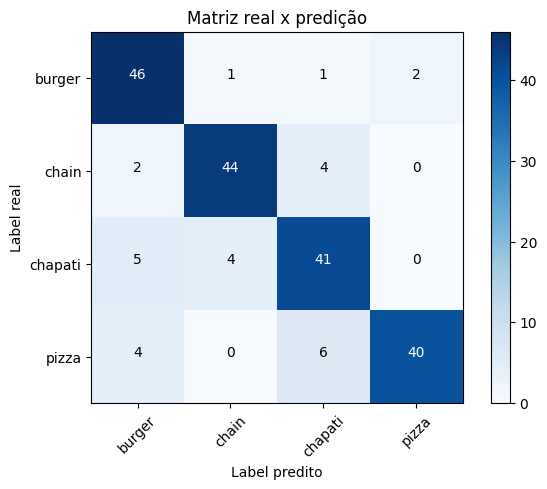

In [56]:
# Matriz de confusão para identificar onde o modelo de deep learning acertou e errou na classificação das imagens de teste

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta função imprime e plota a matriz de confusão.
    A normalização pode ser aplicada definindo `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusão normalizada")
    else:
        print('Matriz de confusão sem normalização')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Label real')
    plt.xlabel('Label predito')


cnf_matrix = confusion_matrix(y_true, y_pred, labels=class_names)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix,
                      classes=['burger',
               'chain',
               'chapati',
               'pizza'],
                      normalize= False,
                      title='Matriz real x predição')

<function matplotlib.pyplot.show(close=None, block=None)>

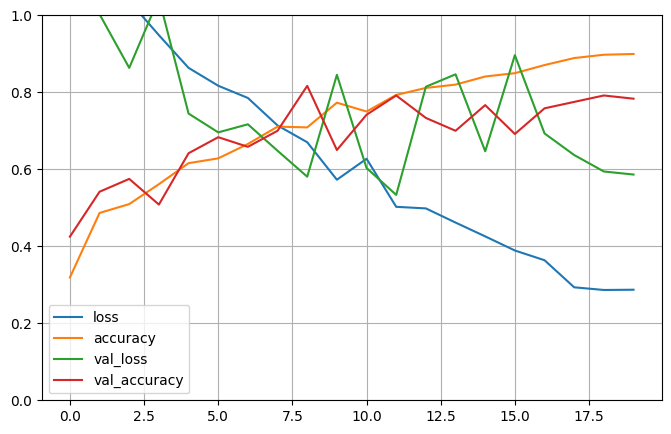

In [57]:
# Por fim, plotei o gráfico comparando precisão e perda de treinamento e validação:

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show